<a href="https://colab.research.google.com/github/yeagerca/Cameron-Yeager-Machine-Learning-Projects/blob/main/Sam_%26_Cameron_Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proposal

1) Project Title:
> Predictors on Student Performance.

Group Members:

> Sam Hamilton, Cameron Yeager.

2) Data set details:

> a) Source (link): https://archive.ics.uci.edu/ml/datasets/Student+Performance
>
> b) Overview: This data set contains attributes relating to the characteristics of students at two high school level Portugues schools and their academic success in Math and Portuguese courses over 3 periods.
>
> c) Number of input features: there are 33 listed attributes, 32 of which are potential input features. We intend to make a model using all of the input features in addition to models that will use a number of select input features.
>
> d) Prediction variable: We plan to predict students G3 (final) grades.

3) Application detail

> a) What type of prediction it is: We plan to use classification by breaking G3 grades into up to 5 different categories to predict.
>
> b) What type of learning algorithm will you use: We plan to use Supervised Learning.
>
> c) What type of model you want to test: We plan to use logistic regression and SVM.

#Data Handling


In [1]:
#Imports
import numpy as np
import pandas as pd
import zipfile
from zipfile import ZipFile
from io import BytesIO
from urllib.request import urlopen

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
resp = urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip')
files_zip = zipfile.ZipFile(BytesIO(resp.read()))
# files_zip.namelist()
directory_to_extract_to = 'student/'#YOUR_DESTINATION_FOLDER
file = "student-mat.csv"
with files_zip as zip_ref:
    zip_ref.extract(file,directory_to_extract_to)
dfMath = pd.read_csv(directory_to_extract_to + file, sep=';')

feature_names = dfMath.columns
labels = feature_names[32]

X_pd = dfMath.iloc[:,:30] #30 and 31 are the G1 and G2 grades which will not be used for finding G3 grades
Y = dfMath.iloc[:,32]

In [3]:
# print the names of the features
print("Features: ", feature_names)

# print the label type of targets
print("Labels: ", labels)

Features:  Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
Labels:  G3


In [4]:
#Converting range of Y from 0-20 to 5 catagories
Y = pd.cut(Y, bins=[-1,4,8,12,16,20], labels=[1,2,3,4,5], ordered=False)

#Converting catigorical inputs to numerical values
school = {'GP': 1,'MS': 0}
X_pd.school = [school[item] for item in X_pd.school]

sex = {'M': 1,'F': 0}
X_pd.sex = [sex[item] for item in X_pd.sex]

address = {'U': 1,'R': 0}
X_pd.address = [address[item] for item in X_pd.address]

famsize = {'LE3': 1,'GT3': 0}
X_pd.famsize = [famsize[item] for item in X_pd.famsize]

Pstatus = {'T': 1,'A': 0}
X_pd.Pstatus = [Pstatus[item] for item in X_pd.Pstatus]

Mjob = {'teacher': 0,'health': 1, 'services' : 2, 'at_home' : 3, 'other' : 4}
X_pd.Mjob = [Mjob[item] for item in X_pd.Mjob]

Fjob = {'teacher': 0,'health': 1, 'services' : 2, 'at_home' : 3, 'other' : 4}
X_pd.Fjob = [Fjob[item] for item in X_pd.Fjob]

reason = {'home': 0,'reputation': 1, 'course' : 2, 'other' : 3}
X_pd.reason = [reason[item] for item in X_pd.reason]

guardian = {'mother': 0,'father': 1, 'other' : 2}
X_pd.guardian = [guardian[item] for item in X_pd.guardian]

yesNo = {'no': 0,'yes': 1}
X_pd.schoolsup = [yesNo[item] for item in X_pd.schoolsup]
X_pd.famsup = [yesNo[item] for item in X_pd.famsup]
X_pd.paid = [yesNo[item] for item in X_pd.paid]
X_pd.activities = [yesNo[item] for item in X_pd.activities]
X_pd.nursery = [yesNo[item] for item in X_pd.nursery]
X_pd.higher = [yesNo[item] for item in X_pd.higher]
X_pd.internet = [yesNo[item] for item in X_pd.internet]
X_pd.romantic = [yesNo[item] for item in X_pd.romantic]

X_pd

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,1,0,18,1,0,0,4,4,3,0,...,1,0,0,4,3,4,1,1,3,6
1,1,0,17,1,0,1,1,1,3,4,...,1,1,0,5,3,3,1,1,3,4
2,1,0,15,1,1,1,1,1,3,4,...,1,1,0,4,3,2,2,3,3,10
3,1,0,15,1,0,1,4,2,1,2,...,1,1,1,3,2,2,1,1,5,2
4,1,0,16,1,0,1,3,3,4,4,...,1,0,0,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,1,20,1,1,0,2,2,2,2,...,1,0,0,5,5,4,4,5,4,11
391,0,1,17,1,1,1,3,1,2,2,...,1,1,0,2,4,5,3,4,2,3
392,0,1,21,0,0,1,1,1,4,4,...,1,0,0,5,5,3,3,3,3,3
393,0,1,18,0,1,1,3,2,2,4,...,1,1,0,4,4,1,3,4,5,0


In [5]:
Y = Y.to_numpy()
X = X_pd.to_numpy()

In [6]:
#Scaling
#X = (X - np.min(X)) / (np.max(X) - np.min(X)) #normalization
X = (X - np.mean(X)) / np.std(X) #STD

In [7]:
def plot_confusion_matrix(cm, classes, normalize=False, 
                          title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [8]:
X_pd

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,1,0,18,1,0,0,4,4,3,0,...,1,0,0,4,3,4,1,1,3,6
1,1,0,17,1,0,1,1,1,3,4,...,1,1,0,5,3,3,1,1,3,4
2,1,0,15,1,1,1,1,1,3,4,...,1,1,0,4,3,2,2,3,3,10
3,1,0,15,1,0,1,4,2,1,2,...,1,1,1,3,2,2,1,1,5,2
4,1,0,16,1,0,1,3,3,4,4,...,1,0,0,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,1,20,1,1,0,2,2,2,2,...,1,0,0,5,5,4,4,5,4,11
391,0,1,17,1,1,1,3,1,2,2,...,1,1,0,2,4,5,3,4,2,3
392,0,1,21,0,0,1,1,1,4,4,...,1,0,0,5,5,3,3,3,3,3
393,0,1,18,0,1,1,3,2,2,4,...,1,1,0,4,4,1,3,4,5,0


In [9]:
X1_pd = X_pd.drop(['school', 'sex', 'age', 'famsize', 'Mjob', 'Fjob', 'reason', 'guardian', 'health', 'address', 'Pstatus', 'Medu', 'Fedu', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'famrel', 'absences'], axis=1)
X1 = X1_pd.to_numpy()
X1 = (X1 - np.mean(X1)) / np.std(X1)
X1_pd

,traveltime,studytime,romantic,freetime,goout,Dalc,Walc
0,2,2,0,3,4,1,1
1,1,2,0,3,3,1,1
2,1,2,0,3,2,2,3
3,1,3,1,2,2,1,1
4,1,2,0,3,2,1,2
...,...,...,...,...,...,...,...
390,1,2,0,5,4,4,5
391,2,1,0,4,5,3,4
392,1,1,0,5,3,3,3
393,3,1,0,4,1,3,4


In [10]:
X2_pd = X_pd.drop(['school', 'sex', 'age', 'famsize', 'Mjob', 'Fjob', 'reason', 'guardian', 'health', 'address', 'schoolsup', 'activities', 'higher', 'famrel', 'traveltime', 'studytime', 'romantic', 'freetime', 'goout', 'Dalc', 'Walc'], axis=1)
X2 = X2_pd.to_numpy()
X2 = (X2 - np.mean(X2)) / np.std(X2)
X2_pd

,Pstatus,Medu,Fedu,failures,famsup,paid,nursery,internet,absences
0,0,4,4,0,0,0,1,0,6
1,1,1,1,0,1,0,0,1,4
2,1,1,1,3,0,1,1,1,10
3,1,4,2,0,1,1,1,1,2
4,1,3,3,0,1,1,1,0,4
...,...,...,...,...,...,...,...,...,...
390,0,2,2,2,1,1,1,0,11
391,1,3,1,0,0,0,0,1,3
392,1,1,1,3,0,0,0,0,3
393,1,3,2,0,0,0,0,1,0


#Model 1 - Logistic Regression

##Model 1 Code

In [11]:
#Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

#train the model
clf = LogisticRegression(solver='newton-cg',C=1.0, max_iter=1000) #Using best results
clf.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

# Model Accuracy: how often the classifier is correct
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.46835443037974683


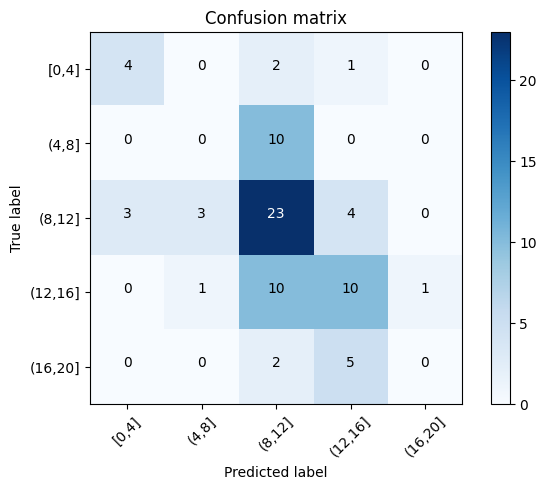

In [12]:
cm = confusion_matrix(Y_test, Y_pred)
cm_labels = ["[0,4]","(4,8]","(8,12]","(12,16]","(16,20]"]
plot_confusion_matrix(cm, cm_labels)  
plt.show()

In [13]:
#s is solver, c is C, m is max_iter
def LogisticLooper(s, c, m, X, Y):
  Accuracy = np.zeros(100)
  for x in range(100):
    #Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    X_train.shape, X_test.shape, y_train.shape, y_test.shape
    #train the model (Here you should change the hyperparameters)
    clf = LogisticRegression(solver=s, C=c, max_iter=m)
    clf.fit(X_train, y_train) # Train Logistic Regression Classifer
    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    Accuracy[x] = float(metrics.accuracy_score(y_test, y_pred))
  print(np.average(Accuracy))

In [14]:
#c = 10.0, 1.0, 0.1   default 1.0
#s = 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'   default 'lbfgs'
#m = 10000, 1000, 100, 10   default 100

#newton-cg, m=10 does not converge
print('\ns=newton-cg, c=10.0')
LogisticLooper('newton-cg', 10.0, 10000, X, Y)
LogisticLooper('newton-cg', 10.0, 1000, X, Y)
LogisticLooper('newton-cg', 10.0, 100, X, Y)
#LogisticLooper('newton-cg', 10.0, 10, X, Y)
print('\ns=newton-cg, c=1.0')
LogisticLooper('newton-cg', 1.0, 10000, X, Y)
LogisticLooper('newton-cg', 1.0, 1000, X, Y)
LogisticLooper('newton-cg', 1.0, 100, X, Y)
#LogisticLooper('newton-cg', 1.0, 10, X, Y)
print('\ns=newton-cg, c=0.1')
LogisticLooper('newton-cg', 0.1, 10000, X, Y)
LogisticLooper('newton-cg', 0.1, 1000, X, Y)
LogisticLooper('newton-cg', 0.1, 100, X, Y)
#LogisticLooper('newton-cg', 0.1, 10, X, Y)


s=newton-cg, c=10.0
0.4162025316455696
0.41772151898734167
0.4091139240506329

s=newton-cg, c=1.0
0.42696202531645566
0.4231645569620253
0.42683544303797466

s=newton-cg, c=0.1
0.4146835443037975
0.4205063291139241
0.42177215189873424


In [15]:
#lbfgs, m=100 does not converge
print('\ns=lbfgs, c=10.0')
LogisticLooper('lbfgs', 10.0, 10000, X, Y)
LogisticLooper('lbfgs', 10.0, 1000, X, Y)
#LogisticLooper('lbfgs', 10.0, 100, X, Y)
#LogisticLooper('lbfgs', 10.0, 10, X, Y)
print('\ns=lbfgs, c=1.0')
LogisticLooper('lbfgs', 1.0, 10000, X, Y)
LogisticLooper('lbfgs', 1.0, 1000, X, Y)
#LogisticLooper('lbfgs', 1.0, 100, X, Y)
#LogisticLooper('lbfgs', 1.0, 10, X, Y)
print('\ns=lbfgs, c=0.1')
LogisticLooper('lbfgs', 0.1, 10000, X, Y)
LogisticLooper('lbfgs', 0.1, 1000, X, Y)
#LogisticLooper('lbfgs', 0.1, 100, X, Y)
#LogisticLooper('lbfgs', 1.0, 10, X, Y)


s=lbfgs, c=10.0
0.42240506329113925
0.40721518987341776

s=lbfgs, c=1.0
0.42405063291139244
0.4237974683544304

s=lbfgs, c=0.1
0.4064556962025317
0.41417721518987344


In [16]:
#liblinear, m=10 converges only when c=0.1
print('\ns=liblinear, c=10.0')
LogisticLooper('liblinear', 10.0, 10000, X, Y)
LogisticLooper('liblinear', 10.0, 1000, X, Y)
LogisticLooper('liblinear', 10.0, 100, X, Y)
#LogisticLooper('liblinear', 10.0, 10, X, Y)

print('\ns=liblinear, c=1.0')
LogisticLooper('liblinear', 1.0, 10000, X, Y)
LogisticLooper('liblinear', 1.0, 1000, X, Y)
LogisticLooper('liblinear', 1.0, 100, X, Y)
#LogisticLooper('liblinear', 1.0, 10, X, Y)

print('\ns=liblinear, c=0.1')
LogisticLooper('liblinear', 0.1, 10000, X, Y)
LogisticLooper('liblinear', 0.1, 1000, X, Y)
LogisticLooper('liblinear', 0.1, 100, X, Y)
LogisticLooper('liblinear', 0.1, 10, X, Y)


s=liblinear, c=10.0
0.4212658227848102
0.4324050632911392
0.41493670886075945

s=liblinear, c=1.0
0.4188607594936709
0.41493670886075945
0.4222784810126582

s=liblinear, c=0.1
0.410253164556962
0.40329113924050625
0.40050632911392403
0.4137974683544304


In [17]:
#sag, m=1000 converges when c=0.1, lower does not converge
print('\ns=sag, c=10.0')
LogisticLooper('sag', 10.0, 10000, X, Y)
#LogisticLooper('sag', 10.0, 1000, X, Y)
#LogisticLooper('sag', 10.0, 100, X, Y)
#LogisticLooper('sag', 10.0, 10, X, Y)
print('\ns=sag, c=1.0')
LogisticLooper('sag', 1.0, 10000, X, Y)
#LogisticLooper('sag', 1.0, 1000, X, Y)
#LogisticLooper('sag', 1.0, 100, X, Y)
#LogisticLooper('sag', 1.0, 10, X, Y)
print('\ns=sag, c=0.1')
LogisticLooper('sag', 0.1, 10000, X, Y)
LogisticLooper('sag', 0.1, 1000, X, Y)
#LogisticLooper('sag', 0.1, 100, X, Y)
#LogisticLooper('sag', 0.1, 10, X, Y)


s=sag, c=10.0
0.4177215189873417

s=sag, c=1.0
0.4222784810126583

s=sag, c=0.1
0.4269620253164558
0.4130379746835443


In [18]:
#saga
print('\ns=saga, c=10.0')
LogisticLooper('saga', 10.0, 10000, X, Y)
#LogisticLooper('saga', 10.0, 1000, X, Y)
#LogisticLooper('saga', 10.0, 100, X, Y)
#LogisticLooper('saga', 10.0, 10, X, Y)
print('\ns=saga, c=1.0')
LogisticLooper('saga', 1.0, 10000, X, Y)
#LogisticLooper('saga', 1.0, 1000, X, Y) #failed to converge 3/100
#LogisticLooper('saga', 1.0, 1100, X, Y) #failed to converge 1/100
#LogisticLooper('saga', 1.0, 1200, X, Y) #failed to converge 2/100
LogisticLooper('saga', 1.0, 1500, X, Y) #converged
#LogisticLooper('saga', 1.0, 100, X, Y)
#LogisticLooper('saga', 1.0, 10, X, Y)
print('\ns=saga, c=0.1')
LogisticLooper('saga', 0.1, 10000, X, Y)
LogisticLooper('saga', 0.1, 1000, X, Y)
#LogisticLooper('saga', 0.1, 100, X, Y)
#LogisticLooper('saga', 0.1, 10, X, Y)


s=saga, c=10.0
0.4207594936708861

s=saga, c=1.0
0.4222784810126582
0.4250632911392405

s=saga, c=0.1
0.4143037974683545


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.41556962025316446


##Model 1 Results

The maximum accuracy of any solver was obtained with the 'newton-cg' solver : 0.431392

This maximum exceeds the maximum of the next best solver by 0.000127, or 0.01% less accurate.

This maximum exceeds the maximum of the second-next best solver by 0.005949, or 0.59% less accurate.

This maximum was obtained by using C=1.0, max_iter=1000. The next best configuration (C=1.0, max_iter=10000) differed by 0.000633, or 0.06% less accurate.

---

Even the best configuration we could find is insufficinet to be a reliable predictor for a given student's G3 grade, being that it is only 43.1% accurate in predicting our test set. These poor results are possibly due the logistic regressor being ill-fit for our data, in which case we should test the data set using an SVM regressor as well. The results may also be flawed due to red herrings in the data; if this is the case, we should choose out input features that we would have the best correlation to the student's final grade. It is also possible that all correlations between the input features and the final grade are weak, in which case our studies are unlikely to produce a viable model.

Hyperparameter combinations data dump. Values represent the average accuracy of a hyperparameter configuration over 100 iterations.

Lines prepended by solver (s) and C (c) settings. Values listed in-line in order of m=10000, 1000 (or 1500), 100, 10. Missing values mean the tests with lower m did not converge.

---

s=newton-cg, c=10.0
0.4140506329113924
0.42265822784810125
0.40531645569620245

s=newton-cg, c=1.0
0.43075949367088606
0.4313924050632912
0.4253164556962027

s=newton-cg, c=0.1
0.41506329113924045
0.40734177215189865
0.42050632911392405

s=lbfgs, c=10.0
0.41645569620253164
0.41265822784810124

s=lbfgs, c=1.0
0.42379746835443044
0.4254430379746835

s=lbfgs, c=0.1
0.4189873417721518
0.41189873417721523

s=liblinear, c=10.0
0.4064556962025317
0.41620253164556964
0.40607594936708863

s=liblinear, c=1.0
0.4312658227848102
0.4143037974683545
0.41683544303797476

s=liblinear, c=0.1
0.4083544303797469
0.4068354430379747
0.40987341772151903
0.40506329113924044

s=sag, c=10.0
0.4217721518987341

s=sag, c=1.0
0.4249367088607595

s=sag, c=0.1
0.4072151898734176
0.4116455696202532

s=saga, c=10.0
0.41164556962025306

s=saga, c=1.0
0.42417721518987334
0.4248101265822784

s=saga, c=0.1
0.4215189873417722
0.41417721518987344

##Model 1 Group 1

In [19]:
#Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

#train the model
clf = LogisticRegression(solver='newton-cg',C=1.0, max_iter=1000) #Using best results
clf.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

# Model Accuracy: how often the classifier is correct
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.379746835443038


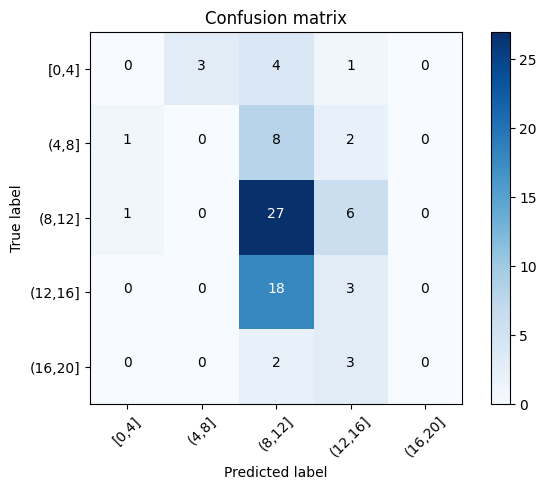

In [20]:
cm = confusion_matrix(Y_test, Y_pred)
cm_labels = ["[0,4]","(4,8]","(8,12]","(12,16]","(16,20]"]
plot_confusion_matrix(cm, cm_labels)  
plt.show()

In [21]:
#s is solver, c is C, m is max_iter
def LogisticLooper(s, c, m, X, Y):
  Accuracy = np.zeros(100)
  for x in range(100):
    #Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    X_train.shape, X_test.shape, y_train.shape, y_test.shape
    #train the model (Here you should change the hyperparameters)
    clf = LogisticRegression(solver=s, C=c, max_iter=m)
    clf.fit(X_train, y_train) # Train Logistic Regression Classifer
    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    Accuracy[x] = float(metrics.accuracy_score(y_test, y_pred))
  print(np.average(Accuracy))

In [22]:
#c = 10.0, 1.0, 0.1   default 1.0
#s = 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'   default 'lbfgs'
#m = 10000, 1000, 100, 10   default 100

#newton-cg, m=10 does not converge
print('\ns=newton-cg, c=10.0')
LogisticLooper('newton-cg', 10.0, 10000, X1, Y)
LogisticLooper('newton-cg', 10.0, 1000, X1, Y)
LogisticLooper('newton-cg', 10.0, 100, X1, Y)
#LogisticLooper('newton-cg', 10.0, 10, X1, Y)
print('\ns=newton-cg, c=1.0')
LogisticLooper('newton-cg', 1.0, 10000, X1, Y)
LogisticLooper('newton-cg', 1.0, 1000, X1, Y)
LogisticLooper('newton-cg', 1.0, 100, X1, Y)
#LogisticLooper('newton-cg', 1.0, 10, X1, Y)
print('\ns=newton-cg, c=0.1')
LogisticLooper('newton-cg', 0.1, 10000, X1, Y)
LogisticLooper('newton-cg', 0.1, 1000, X1, Y)
LogisticLooper('newton-cg', 0.1, 100, X1, Y)
#LogisticLooper('newton-cg', 0.1, 10, X1, Y)


s=newton-cg, c=10.0
0.3713924050632911
0.3849367088607595
0.37164556962025314

s=newton-cg, c=1.0
0.3751898734177215
0.3687341772151899
0.37544303797468354

s=newton-cg, c=0.1
0.38367088607594946
0.3899999999999999
0.3846835443037974


In [23]:
#lbfgs, m=100 does not converge
print('\ns=lbfgs, c=10.0')
LogisticLooper('lbfgs', 10.0, 10000, X1, Y)
LogisticLooper('lbfgs', 10.0, 1000, X1, Y)
LogisticLooper('lbfgs', 10.0, 100, X1, Y)
#LogisticLooper('lbfgs', 10.0, 10, X1, Y)
print('\ns=lbfgs, c=1.0')
LogisticLooper('lbfgs', 1.0, 10000, X1, Y)
LogisticLooper('lbfgs', 1.0, 1000, X1, Y)
LogisticLooper('lbfgs', 1.0, 100, X1, Y)
#LogisticLooper('lbfgs', 1.0, 10, X1, Y)
print('\ns=lbfgs, c=0.1')
LogisticLooper('lbfgs', 0.1, 10000, X1, Y)
LogisticLooper('lbfgs', 0.1, 1000, X1, Y)
LogisticLooper('lbfgs', 0.1, 100, X1, Y)
#LogisticLooper('lbfgs', 1.0, 10, X1, Y)


s=lbfgs, c=10.0
0.37544303797468354
0.3708860759493671


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.3770886075949366

s=lbfgs, c=1.0
0.38164556962025314
0.36746835443037973
0.3812658227848102

s=lbfgs, c=0.1
0.3920253164556962
0.38481012658227853
0.39


In [24]:
#liblinear, m=10 converges only when c=0.1
print('\ns=liblinear, c=10.0')
LogisticLooper('liblinear', 10.0, 10000, X1, Y)
LogisticLooper('liblinear', 10.0, 1000, X1, Y)
LogisticLooper('liblinear', 10.0, 100, X1, Y)
LogisticLooper('liblinear', 10.0, 10, X1, Y)

print('\ns=liblinear, c=1.0')
LogisticLooper('liblinear', 1.0, 10000, X1, Y)
LogisticLooper('liblinear', 1.0, 1000, X1, Y)
LogisticLooper('liblinear', 1.0, 100, X1, Y)
LogisticLooper('liblinear', 1.0, 10, X1, Y)

print('\ns=liblinear, c=0.1')
LogisticLooper('liblinear', 0.1, 10000, X1, Y)
LogisticLooper('liblinear', 0.1, 1000, X1, Y)
LogisticLooper('liblinear', 0.1, 100, X1, Y)
LogisticLooper('liblinear', 0.1, 10, X1, Y)


s=liblinear, c=10.0
0.38253164556962027
0.37784810126582274
0.37556962025316454
0.380253164556962

s=liblinear, c=1.0
0.3783544303797469
0.38810126582278487
0.3830379746835442
0.37746835443037974

s=liblinear, c=0.1
0.39860759493670883
0.38848101265822776
0.3948101265822784
0.39291139240506334


In [25]:
#sag, m=1000 converges when c=0.1, lower does not converge
print('\ns=sag, c=10.0')
LogisticLooper('sag', 10.0, 10000, X1, Y)
LogisticLooper('sag', 10.0, 1000, X1, Y)
#LogisticLooper('sag', 10.0, 100, X1, Y)
#LogisticLooper('sag', 10.0, 10, X1, Y)
print('\ns=sag, c=1.0')
LogisticLooper('sag', 1.0, 10000, X1, Y)
LogisticLooper('sag', 1.0, 1000, X1, Y)
LogisticLooper('sag', 1.0, 100, X1, Y)
#LogisticLooper('sag', 1.0, 10, X1, Y)
print('\ns=sag, c=0.1')
LogisticLooper('sag', 0.1, 10000, X1, Y)
LogisticLooper('sag', 0.1, 1000, X1, Y)
LogisticLooper('sag', 0.1, 100, X1, Y)
#LogisticLooper('sag', 0.1, 10, X1, Y)


s=sag, c=10.0
0.38139240506329114
0.37607594936708866

s=sag, c=1.0
0.37468354430379747
0.3788607594936708
0.38215189873417726

s=sag, c=0.1
0.38949367088607595
0.39949367088607596
0.39481012658227854


In [26]:
#saga
print('\ns=saga, c=10.0')
LogisticLooper('saga', 10.0, 10000, X1, Y)
LogisticLooper('saga', 10.0, 1000, X1, Y)
#LogisticLooper('saga', 10.0, 100, X1, Y)
#LogisticLooper('saga', 10.0, 10, X1, Y)
print('\ns=saga, c=1.0')
LogisticLooper('saga', 1.0, 10000, X1, Y)
LogisticLooper('saga', 1.0, 1000, X1, Y)
#LogisticLooper('saga', 1.0, 100, X1, Y)
#LogisticLooper('saga', 1.0, 10, X1, Y)
print('\ns=saga, c=0.1')
LogisticLooper('saga', 0.1, 10000, X1, Y)
LogisticLooper('saga', 0.1, 1000, X1, Y)
LogisticLooper('saga', 0.1, 100, X1, Y)
#LogisticLooper('saga', 0.1, 10, X1, Y)


s=saga, c=10.0
0.37063291139240506
0.3813924050632911

s=saga, c=1.0
0.3756962025316456
0.3759493670886076

s=saga, c=0.1
0.39253164556962017
0.37987341772151906
0.3913924050632911


##Model 1 Group 1 Results

The maximum accuracy of any solver was obtained with the 'liblinear' solver : 0.400886

This maximum exceeds the maximum of the next best solver by 0.002532, or 0.25% less accurate.

This maximum exceeds the maximum of the second-next best solver by 0.003165, or 0.32% less accurate.

This maximum was obtained by using C=1.0, max_iter=1000. The next best configuration (C=1.0, max_iter=10000) differed by 0.000253, or 0.03% less accurate.

---

Even the best configuration we could find is insufficinet to be a reliable predictor for a given student's G3 grade, being that it is only 40.1% accurate in predicting our test set. These poor results are possibly due the logistic regressor being ill-fit for our data, in which case we should test the data set using an SVM regressor as well. It is also possible that all correlations between the input features and the final grade are weak, in which case our studies are unlikely to produce a viable model.

Hyperparameter combinations data dump. Values represent the average accuracy of a hyperparameter configuration over 100 iterations.

Lines prepended by solver (s) and C (c) settings. Values listed in-line in order of m=10000, 1000, 100, 10. Missing values mean the tests with lower m did not converge.

---

s=newton-cg, c=10.0
0.3735443037974683
0.3741772151898734
0.3718987341772152

s=newton-cg, c=1.0
0.3744303797468354
0.3789873417721519
0.3754430379746836

s=newton-cg, c=0.1
0.38936708860759495
0.38227848101265816
0.38759493670886075

s=lbfgs, c=10.0
0.37772151898734174
0.37227848101265826
0.3721518987341772

s=lbfgs, c=1.0
0.3758227848101266
0.3732911392405062
0.37620253164556955

s=lbfgs, c=0.1
0.3864556962025317
0.3916455696202532
0.3825316455696202

s=liblinear, c=10.0
0.3820253164556962
0.381012658227848
0.3824050632911393
0.3832911392405063

s=liblinear, c=1.0
0.37784810126582286
0.37506329113924053
0.38594936708860755
0.3779746835443037

s=liblinear, c=0.1
0.40063291139240503
0.4008860759493671
0.3982278481012657
0.3949367088607595

s=sag, c=10.0
0.37949367088607594
0.36835443037974686

s=sag, c=1.0
0.37620253164556966
0.3732911392405064
0.3727848101265823

s=sag, c=0.1
0.38443037974683547
0.39835443037974677
0.39291139240506334

s=saga, c=10.0
0.36911392405063287
0.3791139240506329

s=saga, c=1.0
0.37822784810126586
0.3763291139240506

s=saga, c=0.1
0.38810126582278487
0.39417721518987336
0.3977215189873417

##Model 1 Group 2

In [27]:
#Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

#train the model
clf = LogisticRegression(solver='newton-cg',C=1.0, max_iter=1000) #Using best results
clf.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

# Model Accuracy: how often the classifier is correct
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.43037974683544306


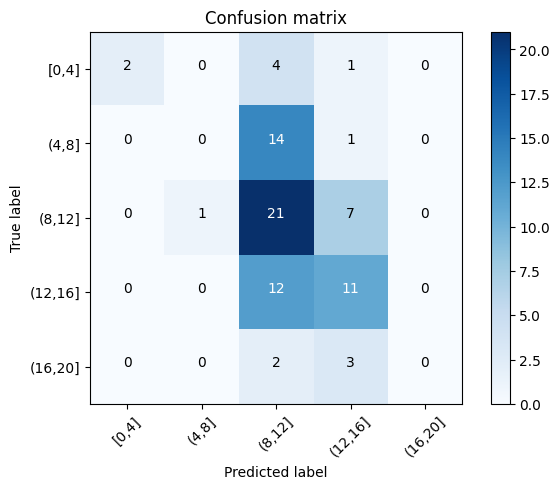

In [28]:
cm = confusion_matrix(Y_test, Y_pred)
cm_labels = ["[0,4]","(4,8]","(8,12]","(12,16]","(16,20]"]
plot_confusion_matrix(cm, cm_labels)  
plt.show()

In [29]:
#s is solver, c is C, m is max_iter
def LogisticLooper(s, c, m, X, Y):
  Accuracy = np.zeros(100)
  for x in range(100):
    #Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    X_train.shape, X_test.shape, y_train.shape, y_test.shape
    #train the model (Here you should change the hyperparameters)
    clf = LogisticRegression(solver=s, C=c, max_iter=m)
    clf.fit(X_train, y_train) # Train Logistic Regression Classifer
    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    Accuracy[x] = float(metrics.accuracy_score(y_test, y_pred))
  print(np.average(Accuracy))

In [30]:
#c = 10.0, 1.0, 0.1   default 1.0
#s = 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'   default 'lbfgs'
#m = 10000, 1000, 100, 10   default 100

#newton-cg, m=10 does not converge
print('\ns=newton-cg, c=10.0')
LogisticLooper('newton-cg', 10.0, 10000, X2, Y)
LogisticLooper('newton-cg', 10.0, 1000, X2, Y)
LogisticLooper('newton-cg', 10.0, 100, X2, Y)
#LogisticLooper('newton-cg', 10.0, 10, X2, Y)
print('\ns=newton-cg, c=1.0')
LogisticLooper('newton-cg', 1.0, 10000, X2, Y)
LogisticLooper('newton-cg', 1.0, 1000, X2, Y)
LogisticLooper('newton-cg', 1.0, 100, X2, Y)
#LogisticLooper('newton-cg', 1.0, 10, X2, Y)
print('\ns=newton-cg, c=0.1')
LogisticLooper('newton-cg', 0.1, 10000, X2, Y)
LogisticLooper('newton-cg', 0.1, 1000, X2, Y)
LogisticLooper('newton-cg', 0.1, 100, X2, Y)
#LogisticLooper('newton-cg', 0.1, 10, X2, Y)


s=newton-cg, c=10.0
0.4315189873417722
0.4324050632911392
0.4236708860759494

s=newton-cg, c=1.0
0.4421518987341772
0.43683544303797467
0.43670886075949367

s=newton-cg, c=0.1
0.40860759493670884
0.4131645569620253
0.4140506329113924


In [31]:
#lbfgs, m=100 does not converge
print('\ns=lbfgs, c=10.0')
LogisticLooper('lbfgs', 10.0, 10000, X2, Y)
LogisticLooper('lbfgs', 10.0, 1000, X2, Y)
#LogisticLooper('lbfgs', 10.0, 100, X2, Y)
#LogisticLooper('lbfgs', 10.0, 10, X2, Y)
print('\ns=lbfgs, c=1.0')
LogisticLooper('lbfgs', 1.0, 10000, X2, Y)
LogisticLooper('lbfgs', 1.0, 1000, X2, Y)
LogisticLooper('lbfgs', 1.0, 100, X2, Y)
#LogisticLooper('lbfgs', 1.0, 10, X2, Y)
print('\ns=lbfgs, c=0.1')
LogisticLooper('lbfgs', 0.1, 10000, X2, Y)
LogisticLooper('lbfgs', 0.1, 1000, X2, Y)
LogisticLooper('lbfgs', 0.1, 100, X2, Y)
#LogisticLooper('lbfgs', 1.0, 10, X2, Y)


s=lbfgs, c=10.0
0.43025316455696205
0.42215189873417713

s=lbfgs, c=1.0
0.43379746835443045
0.4367088607594936
0.43962025316455694

s=lbfgs, c=0.1
0.4216455696202532
0.4058227848101266
0.41696202531645565


In [32]:
#liblinear, m=10 converges only when c=0.1
print('\ns=liblinear, c=10.0')
LogisticLooper('liblinear', 10.0, 10000, X2, Y)
LogisticLooper('liblinear', 10.0, 1000, X2, Y)
LogisticLooper('liblinear', 10.0, 100, X2, Y)
#LogisticLooper('liblinear', 10.0, 10, X2, Y)
print('\ns=liblinear, c=1.0')
LogisticLooper('liblinear', 1.0, 10000, X2, Y)
LogisticLooper('liblinear', 1.0, 1000, X2, Y)
LogisticLooper('liblinear', 1.0, 100, X2, Y)
LogisticLooper('liblinear', 1.0, 10, X2, Y)
print('\ns=liblinear, c=0.1')
LogisticLooper('liblinear', 0.1, 10000, X2, Y)
LogisticLooper('liblinear', 0.1, 1000, X2, Y)
LogisticLooper('liblinear', 0.1, 100, X2, Y)
LogisticLooper('liblinear', 0.1, 10, X2, Y)


s=liblinear, c=10.0
0.42632911392405065
0.4346835443037974
0.42569620253164553

s=liblinear, c=1.0
0.43126582278481007
0.4292405063291138
0.4346835443037974
0.4260759493670886

s=liblinear, c=0.1
0.4069620253164556
0.40417721518987343
0.4081012658227847
0.4108860759493671


In [33]:
#sag, m=1000 converges when c=0.1, lower does not converge
print('\ns=sag, c=10.0')
LogisticLooper('sag', 10.0, 10000, X2, Y)
#LogisticLooper('sag', 10.0, 1000, X2, Y)
#LogisticLooper('sag', 10.0, 100, X2, Y)
#LogisticLooper('sag', 10.0, 10, X2, Y)
print('\ns=sag, c=1.0')
LogisticLooper('sag', 1.0, 10000, X2, Y)
LogisticLooper('sag', 1.0, 1000, X2, Y)
#LogisticLooper('sag', 1.0, 100, X2, Y)
#LogisticLooper('sag', 1.0, 10, X2, Y)
print('\ns=sag, c=0.1')
LogisticLooper('sag', 0.1, 10000, X2, Y)
LogisticLooper('sag', 0.1, 1000, X2, Y)
#LogisticLooper('sag', 0.1, 100, X2, Y)
#LogisticLooper('sag', 0.1, 10, X2, Y)


s=sag, c=10.0
0.4253164556962025

s=sag, c=1.0
0.43240506329113915
0.441012658227848

s=sag, c=0.1
0.4182278481012658
0.41721518987341766


In [34]:
#saga
print('\ns=saga, c=10.0')
LogisticLooper('saga', 10.0, 10000, X2, Y)
#LogisticLooper('saga', 10.0, 1000, X2, Y)
#LogisticLooper('saga', 10.0, 100, X2, Y)
#LogisticLooper('saga', 10.0, 10, X2, Y)
print('\ns=saga, c=1.0')
LogisticLooper('saga', 1.0, 10000, X2, Y)
LogisticLooper('saga', 1.0, 1000, X2, Y)
#LogisticLooper('saga', 1.0, 100, X2, Y)
#LogisticLooper('saga', 1.0, 10, X2, Y)
print('\ns=saga, c=0.1')
LogisticLooper('saga', 0.1, 10000, X2, Y)
LogisticLooper('saga', 0.1, 1000, X2, Y)
#LogisticLooper('saga', 0.1, 100, X2, Y)
#LogisticLooper('saga', 0.1, 10, X2, Y)


s=saga, c=10.0
0.43620253164556955

s=saga, c=1.0
0.42860759493670886
0.43253164556962026

s=saga, c=0.1
0.4067088607594937
0.4101265822784811


##Model 1 Group 2 Results

The maximum accuracy of any solver was obtained with the 'sag' solver : 0.443924

This maximum exceeds the maximum of the next best solver by 0.001139, or 0.1% less accurate.

This maximum exceeds the maximum of the second-next best solver by 0.002911, or 0.29% less accurate.

This maximum was obtained by using C=1.0, max_iter=10000. The next best configuration (C=1.0, max_iter=1000) differed by 0.009747, or 0.97% less accurate.

---

Even the best configuration we could find is insufficinet to be a reliable predictor for a given student's G3 grade, being that it is only 44.4% accurate in predicting our test set. These poor results are possibly due the logistic regressor being ill-fit for our data, in which case we should test the data set using an SVM regressor as well. It is also possible that all correlations between the input features and the final grade are weak, in which case our studies are unlikely to produce a viable model.

Hyperparameter combinations data dump. Values represent the average accuracy of a hyperparameter configuration over 100 iterations.

Lines prepended by solver (s) and C (c) settings. Values listed in-line in order of m=10000, 1000, 100, 10. Missing values mean the tests with lower m did not converge.

---

s=newton-cg, c=10.0
0.4355696202531644
0.42974683544303793
0.43291139240506316

s=newton-cg, c=1.0
0.4335443037974682
0.43784810126582274
0.44278481012658216

s=newton-cg, c=0.1
0.40924050632911396
0.41151898734177217
0.4087341772151898

s=lbfgs, c=10.0
0.43240506329113926
0.4251898734177215

s=lbfgs, c=1.0
0.43443037974683546
0.4287341772151898
0.43531645569620253

s=lbfgs, c=0.1
0.410379746835443
0.41075949367088604
0.40721518987341776

s=liblinear, c=10.0
0.42987341772151894
0.43075949367088606
0.4278481012658228

s=liblinear, c=1.0
0.441012658227848
0.43506329113924047
0.43405063291139234
0.4270886075949367

s=liblinear, c=0.1
0.40455696202531644
0.40506329113924056
0.40886075949367084
0.4137974683544302

s=sag, c=10.0
0.42860759493670886

s=sag, c=1.0
0.44392405063291135
0.43417721518987334

s=sag, c=0.1
0.4081012658227847
0.4135443037974684

s=saga, c=10.0
0.42759493670886073

s=saga, c=1.0
0.42683544303797466
0.4337974683544303

s=saga, c=0.1
0.41493670886075945
0.4140506329113924

#Model 2 - SVM

##Model 2 All Inputs

In [35]:
#Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

#train the model
clf = svm.SVC(kernel='linear', C=1, tol=0.01) #Using best results
clf.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

# Model Accuracy: how often the classifier is correct
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.43037974683544306


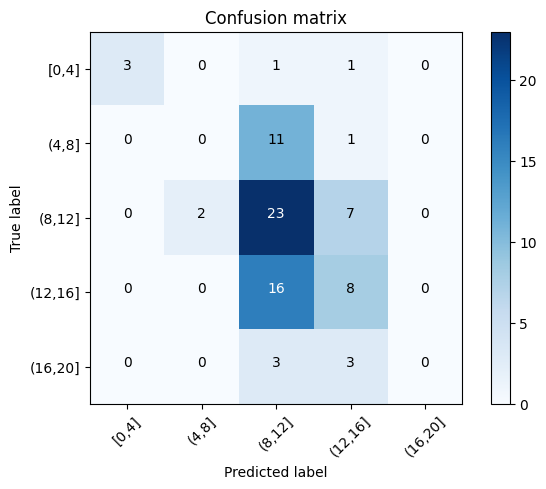

In [36]:
cm = confusion_matrix(Y_test, Y_pred)
cm_labels = ["[0,4]","(4,8]","(8,12]","(12,16]","(16,20]"]
plot_confusion_matrix(cm, cm_labels)  
plt.show()

In [37]:
#k is kernel, c is C, t is tol
def SVMLooper(k, c, t, X, Y):
  Accuracy = np.zeros(100)
  for x in range(100):
    #Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    X_train.shape, X_test.shape, y_train.shape, y_test.shape
    #train the model (Here you should change the hyperparameters)
    clf = clf = svm.SVC(kernel=k, C=c, tol=t)
    clf.fit(X_train, y_train) # Train Logistic Regression Classifer
    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    Accuracy[x] = float(metrics.accuracy_score(y_test, y_pred))
  print(np.average(Accuracy))

In [38]:
#k = 'linear','poly','rbf', 'sigmoid'   default rbf
#c = 10.0, 1.0, 0.1   default 1.0
#t = 0.0001, 0.001, 0.01, 0.1, 1.0   default 1e-3

#linear
print('\nk=linear, c=10.0')
SVMLooper('linear', 10.0, 0.0001, X, Y)
SVMLooper('linear', 10.0, 0.001, X, Y)
SVMLooper('linear', 10.0, 0.01, X, Y)
SVMLooper('linear', 10.0, 0.1, X, Y)
SVMLooper('linear', 10.0, 1.0, X, Y)
print('\nk=linear, c=1.0')
SVMLooper('linear', 1.0, 0.0001, X, Y)
SVMLooper('linear', 1.0, 0.001, X, Y)
SVMLooper('linear', 1.0, 0.01, X, Y)
SVMLooper('linear', 1.0, 0.1, X, Y)
SVMLooper('linear', 1.0, 1.0, X, Y)
print('\nk=linear, c=0.1')
SVMLooper('linear', 0.1, 0.0001, X, Y)
SVMLooper('linear', 0.1, 0.001, X, Y)
SVMLooper('linear', 0.1, 0.01, X, Y)
SVMLooper('linear', 0.1, 0.1, X, Y)
SVMLooper('linear', 0.1, 1.0, X, Y)


k=linear, c=10.0
0.4275949367088607
0.430632911392405
0.4236708860759494
0.41645569620253153
0.4207594936708861

k=linear, c=1.0
0.4213924050632911
0.42620253164556965
0.4218987341772151
0.42974683544303793
0.4364556962025316

k=linear, c=0.1
0.3978481012658228
0.4087341772151899
0.39898734177215195
0.40810126582278483
0.4156962025316456


In [39]:
#poly
print('\nk=poly, c=10.0')
SVMLooper('poly', 10.0, 0.0001, X, Y)
SVMLooper('poly', 10.0, 0.001, X, Y)
SVMLooper('poly', 10.0, 0.01, X, Y)
SVMLooper('poly', 10.0, 0.1, X, Y)
SVMLooper('poly', 10.0, 1.0, X, Y)
print('\nk=poly, c=1.0')
SVMLooper('poly', 1.0, 0.0001, X, Y)
SVMLooper('poly', 1.0, 0.001, X, Y)
SVMLooper('poly', 1.0, 0.01, X, Y)
SVMLooper('poly', 1.0, 0.1, X, Y)
SVMLooper('poly', 1.0, 1.0, X, Y)
print('\nk=poly, c=0.1')
SVMLooper('poly', 0.1, 0.0001, X, Y)
SVMLooper('poly', 0.1, 0.001, X, Y)
SVMLooper('poly', 0.1, 0.01, X, Y)
SVMLooper('poly', 0.1, 0.1, X, Y)
SVMLooper('poly', 0.1, 1.0, X, Y)


k=poly, c=10.0
0.4091139240506328
0.4039240506329113
0.4097468354430379
0.4001265822784809
0.4134177215189873

k=poly, c=1.0
0.40670886075949364
0.39810126582278477
0.4084810126582278
0.40493670886075944
0.40506329113924044

k=poly, c=0.1
0.41202531645569623
0.40974683544303786
0.4139240506329114
0.4027848101265821
0.40607594936708863


In [40]:
#rbf
print('\nk=rbf, c=10.0')
SVMLooper('rbf', 10.0, 0.0001, X, Y)
SVMLooper('rbf', 10.0, 0.001, X, Y)
SVMLooper('rbf', 10.0, 0.01, X, Y)
SVMLooper('rbf', 10.0, 0.1, X, Y)
SVMLooper('rbf', 10.0, 1.0, X, Y)
print('\nk=rbf, c=1.0')
SVMLooper('rbf', 1.0, 0.0001, X, Y)
SVMLooper('rbf', 1.0, 0.001, X, Y)
SVMLooper('rbf', 1.0, 0.01, X, Y)
SVMLooper('rbf', 1.0, 0.1, X, Y)
SVMLooper('rbf', 1.0, 1.0, X, Y)
print('\nk=rbf, c=0.1')
SVMLooper('rbf', 0.1, 0.0001, X, Y)
SVMLooper('rbf', 0.1, 0.001, X, Y)
SVMLooper('rbf', 0.1, 0.01, X, Y)
SVMLooper('rbf', 0.1, 0.1, X, Y)
SVMLooper('rbf', 0.1, 1.0, X, Y)


k=rbf, c=10.0
0.41506329113924045
0.41582278481012663
0.41810126582278484
0.41924050632911397
0.41481012658227845

k=rbf, c=1.0
0.3988607594936709
0.4049367088607594
0.40594936708860757
0.40898734177215196
0.4046835443037975

k=rbf, c=0.1
0.4035443037974683
0.41405063291139244
0.40443037974683543
0.4062025316455697
0.40962025316455697


In [41]:
#sigmoid
print('\nk=sigmoid, c=10.0')
SVMLooper('sigmoid', 10.0, 0.0001, X, Y)
SVMLooper('sigmoid', 10.0, 0.001, X, Y)
SVMLooper('sigmoid', 10.0, 0.01, X, Y)
SVMLooper('sigmoid', 10.0, 0.1, X, Y)
SVMLooper('sigmoid', 10.0, 1.0, X, Y)
print('\nk=sigmoid, c=1.0')
SVMLooper('sigmoid', 1.0, 0.0001, X, Y)
SVMLooper('sigmoid', 1.0, 0.001, X, Y)
SVMLooper('sigmoid', 1.0, 0.01, X, Y)
SVMLooper('sigmoid', 1.0, 0.1, X, Y)
SVMLooper('sigmoid', 1.0, 1.0, X, Y)
print('\nk=sigmoid, c=0.1')
SVMLooper('sigmoid', 0.1, 0.0001, X, Y)
SVMLooper('sigmoid', 0.1, 0.001, X, Y)
SVMLooper('sigmoid', 0.1, 0.01, X, Y)
SVMLooper('sigmoid', 0.1, 0.1, X, Y)
SVMLooper('sigmoid', 0.1, 1.0, X, Y)


k=sigmoid, c=10.0
0.3982278481012658
0.3921518987341772
0.39291139240506323
0.3884810126582278
0.39240506329113933

k=sigmoid, c=1.0
0.39506329113924055
0.3958227848101265
0.39582278481012656
0.39265822784810117
0.39949367088607596

k=sigmoid, c=0.1
0.4087341772151899
0.4091139240506329
0.41860759493670885
0.409240506329114
0.4084810126582279


##Model 2 Group 1 Inputs

Accuracy: 0.4177215189873418


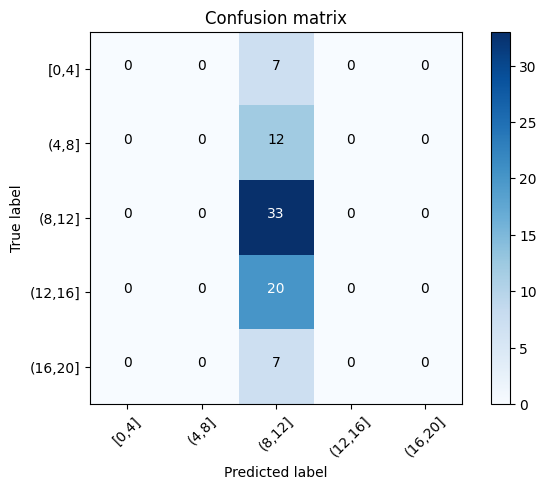

In [42]:
#Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

#train the model
clf = svm.SVC(kernel='linear', C=1, tol=0.1) #Using best results
clf.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

# Model Accuracy: how often the classifier is correct
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

cm = confusion_matrix(Y_test, Y_pred)
cm_labels = ["[0,4]","(4,8]","(8,12]","(12,16]","(16,20]"]
plot_confusion_matrix(cm, cm_labels)  
plt.show()

In [43]:
#k = 'linear','poly','rbf', 'sigmoid'   default rbf
#c = 10.0, 1.0, 0.1   default 1.0
#t = 0.0001, 0.001, 0.01, 0.1, 1.0   default 1e-3

#linear
print('\nk=linear, c=10.0')
SVMLooper('linear', 10.0, 0.0001, X1, Y)
SVMLooper('linear', 10.0, 0.001, X1, Y)
SVMLooper('linear', 10.0, 0.01, X1, Y)
SVMLooper('linear', 10.0, 0.1, X1, Y)
SVMLooper('linear', 10.0, 1.0, X1, Y)
print('\nk=linear, c=1.0')
SVMLooper('linear', 1.0, 0.0001, X1, Y)
SVMLooper('linear', 1.0, 0.001, X1, Y)
SVMLooper('linear', 1.0, 0.01, X1, Y)
SVMLooper('linear', 1.0, 0.1, X1, Y)
SVMLooper('linear', 1.0, 1.0, X1, Y)
print('\nk=linear, c=0.1')
SVMLooper('linear', 0.1, 0.0001, X1, Y)
SVMLooper('linear', 0.1, 0.001, X1, Y)
SVMLooper('linear', 0.1, 0.01, X1, Y)
SVMLooper('linear', 0.1, 0.1, X1, Y)
SVMLooper('linear', 0.1, 1.0, X1, Y)


k=linear, c=10.0
0.40518987341772145
0.40594936708860757
0.39924050632911395
0.4069620253164558
0.4044303797468355

k=linear, c=1.0
0.41303797468354425
0.4100000000000001
0.40734177215189876
0.41202531645569623
0.41291139240506325

k=linear, c=0.1
0.4117721518987342
0.40632911392405063
0.40430379746835443
0.4088607594936709
0.4129113924050633


In [44]:
#sigmoid
print('\nk=sigmoid, c=10.0')
SVMLooper('sigmoid', 10.0, 0.0001, X1, Y)
SVMLooper('sigmoid', 10.0, 0.001, X1, Y)
SVMLooper('sigmoid', 10.0, 0.01, X1, Y)
SVMLooper('sigmoid', 10.0, 0.1, X1, Y)
SVMLooper('sigmoid', 10.0, 1.0, X1, Y)
print('\nk=sigmoid, c=1.0')
SVMLooper('sigmoid', 1.0, 0.0001, X1, Y)
SVMLooper('sigmoid', 1.0, 0.001, X1, Y)
SVMLooper('sigmoid', 1.0, 0.01, X1, Y)
SVMLooper('sigmoid', 1.0, 0.1, X1, Y)
SVMLooper('sigmoid', 1.0, 1.0, X1, Y)
print('\nk=sigmoid, c=0.1')
SVMLooper('sigmoid', 0.1, 0.0001, X1, Y)
SVMLooper('sigmoid', 0.1, 0.001, X1, Y)
SVMLooper('sigmoid', 0.1, 0.01, X1, Y)
SVMLooper('sigmoid', 0.1, 0.1, X1, Y)
SVMLooper('sigmoid', 0.1, 1.0, X1, Y)


k=sigmoid, c=10.0
0.31531645569620254
0.30468354430379746
0.31215189873417715
0.3075949367088608
0.31063291139240506

k=sigmoid, c=1.0
0.3721518987341772
0.37278481012658227
0.37392405063291134
0.3763291139240506
0.38531645569620254

k=sigmoid, c=0.1
0.4059493670886075
0.4092405063291139
0.4143037974683545
0.410253164556962
0.40594936708860757


In [45]:
#rbf
print('\nk=rbf, c=10.0')
SVMLooper('rbf', 10.0, 0.0001, X1, Y)
SVMLooper('rbf', 10.0, 0.001, X1, Y)
SVMLooper('rbf', 10.0, 0.01, X1, Y)
SVMLooper('rbf', 10.0, 0.1, X1, Y)
SVMLooper('rbf', 10.0, 1.0, X1, Y)
print('\nk=rbf, c=1.0')
SVMLooper('rbf', 1.0, 0.0001, X1, Y)
SVMLooper('rbf', 1.0, 0.001, X1, Y)
SVMLooper('rbf', 1.0, 0.01, X1, Y)
SVMLooper('rbf', 1.0, 0.1, X1, Y)
SVMLooper('rbf', 1.0, 1.0, X1, Y)
print('\nk=rbf, c=0.1')
SVMLooper('rbf', 0.1, 0.0001, X1, Y)
SVMLooper('rbf', 0.1, 0.001, X1, Y)
SVMLooper('rbf', 0.1, 0.01, X1, Y)
SVMLooper('rbf', 0.1, 0.1, X1, Y)
SVMLooper('rbf', 0.1, 1.0, X1, Y)


k=rbf, c=10.0
0.37987341772151895
0.37164556962025325
0.36848101265822786
0.3659493670886076
0.3682278481012658

k=rbf, c=1.0
0.3887341772151899
0.3988607594936709
0.4039240506329113
0.39670886075949363
0.390632911392405

k=rbf, c=0.1
0.4129113924050633
0.40721518987341776
0.4106329113924051
0.40417721518987343
0.40518987341772145


In [46]:
#poly
print('\nk=poly, c=10.0')
SVMLooper('poly', 10.0, 0.0001, X1, Y)
SVMLooper('poly', 10.0, 0.001, X1, Y)
SVMLooper('poly', 10.0, 0.01, X1, Y)
SVMLooper('poly', 10.0, 0.1, X1, Y)
SVMLooper('poly', 10.0, 1.0, X1, Y)
print('\nk=poly, c=1.0')
SVMLooper('poly', 1.0, 0.0001, X1, Y)
SVMLooper('poly', 1.0, 0.001, X1, Y)
SVMLooper('poly', 1.0, 0.01, X1, Y)
SVMLooper('poly', 1.0, 0.1, X1, Y)
SVMLooper('poly', 1.0, 1.0, X1, Y)
print('\nk=poly, c=0.1')
SVMLooper('poly', 0.1, 0.0001, X1, Y)
SVMLooper('poly', 0.1, 0.001, X1, Y)
SVMLooper('poly', 0.1, 0.01, X1, Y)
SVMLooper('poly', 0.1, 0.1, X1, Y)
SVMLooper('poly', 0.1, 1.0, X1, Y)


k=poly, c=10.0
0.37911392405063293
0.3773417721518987
0.37544303797468354
0.3851898734177215
0.38518987341772154

k=poly, c=1.0
0.3831645569620254
0.3963291139240506
0.3948101265822784
0.39721518987341775
0.38506329113924054

k=poly, c=0.1
0.41341772151898726
0.4040506329113925
0.4011392405063291
0.40518987341772145
0.4155696202531646


##Model 2 Group 2 Inputs

Accuracy: 0.43037974683544306


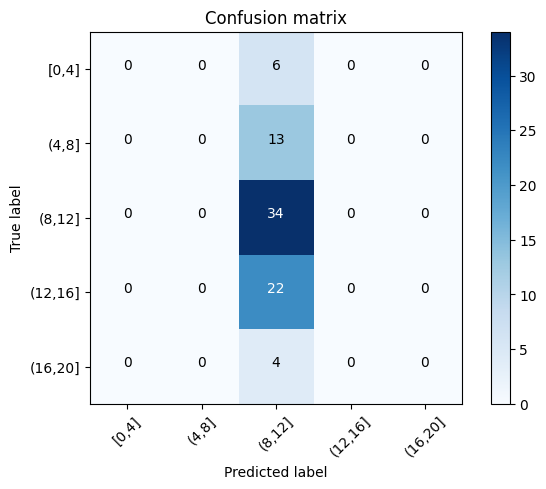

In [47]:
#Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

#train the model
clf = svm.SVC(kernel='poly', C=1, tol=0.0001) #Using best results
clf.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

# Model Accuracy: how often the classifier is correct
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

cm = confusion_matrix(Y_test, Y_pred)
cm_labels = ["[0,4]","(4,8]","(8,12]","(12,16]","(16,20]"]
plot_confusion_matrix(cm, cm_labels)  
plt.show()

In [48]:
#k = 'linear','poly','rbf', 'sigmoid'   default rbf
#c = 10.0, 1.0, 0.1   default 1.0
#t = 0.0001, 0.001, 0.01, 0.1, 1.0   default 1e-3

#linear
print('\nk=linear, c=10.0')
SVMLooper('linear', 10.0, 0.0001, X2, Y)
SVMLooper('linear', 10.0, 0.001, X2, Y)
SVMLooper('linear', 10.0, 0.01, X2, Y)
SVMLooper('linear', 10.0, 0.1, X2, Y)
SVMLooper('linear', 10.0, 1.0, X2, Y)
print('\nk=linear, c=1.0')
SVMLooper('linear', 1.0, 0.0001, X2, Y)
SVMLooper('linear', 1.0, 0.001, X2, Y)
SVMLooper('linear', 1.0, 0.01, X2, Y)
SVMLooper('linear', 1.0, 0.1, X2, Y)
SVMLooper('linear', 1.0, 1.0, X2, Y)
print('\nk=linear, c=0.1')
SVMLooper('linear', 0.1, 0.0001, X2, Y)
SVMLooper('linear', 0.1, 0.001, X2, Y)
SVMLooper('linear', 0.1, 0.01, X2, Y)
SVMLooper('linear', 0.1, 0.1, X2, Y)
SVMLooper('linear', 0.1, 1.0, X2, Y)


k=linear, c=10.0
0.42050632911392405
0.42126582278481
0.4144303797468354
0.4169620253164556
0.4075949367088608

k=linear, c=1.0
0.4118987341772151
0.4134177215189873
0.4146835443037975
0.4136708860759494
0.4078481012658227

k=linear, c=0.1
0.4074683544303797
0.4144303797468354
0.41658227848101265
0.4139240506329114
0.40632911392405063


In [49]:
#poly
print('\nk=poly, c=10.0')
SVMLooper('poly', 10.0, 0.0001, X2, Y)
SVMLooper('poly', 10.0, 0.001, X2, Y)
SVMLooper('poly', 10.0, 0.01, X2, Y)
SVMLooper('poly', 10.0, 0.1, X2, Y)
SVMLooper('poly', 10.0, 1.0, X2, Y)
print('\nk=poly, c=1.0')
SVMLooper('poly', 1.0, 0.0001, X2, Y)
SVMLooper('poly', 1.0, 0.001, X2, Y)
SVMLooper('poly', 1.0, 0.01, X2, Y)
SVMLooper('poly', 1.0, 0.1, X2, Y)
SVMLooper('poly', 1.0, 1.0, X2, Y)
print('\nk=poly, c=0.1')
SVMLooper('poly', 0.1, 0.0001, X2, Y)
SVMLooper('poly', 0.1, 0.001, X2, Y)
SVMLooper('poly', 0.1, 0.01, X2, Y)
SVMLooper('poly', 0.1, 0.1, X2, Y)
SVMLooper('poly', 0.1, 1.0, X2, Y)


k=poly, c=10.0
0.39822784810126577
0.4
0.39265822784810134
0.4053164556962025
0.3937974683544303

k=poly, c=1.0
0.4015189873417722
0.41189873417721523
0.40075949367088604
0.39658227848101263
0.40481012658227855

k=poly, c=0.1
0.4115189873417721
0.40392405063291137
0.41025316455696204
0.3991139240506329
0.41392405063291143


In [50]:
#rbf
print('\nk=rbf, c=10.0')
SVMLooper('rbf', 10.0, 0.0001, X2, Y)
SVMLooper('rbf', 10.0, 0.001, X2, Y)
SVMLooper('rbf', 10.0, 0.01, X2, Y)
SVMLooper('rbf', 10.0, 0.1, X2, Y)
SVMLooper('rbf', 10.0, 1.0, X2, Y)
print('\nk=rbf, c=1.0')
SVMLooper('rbf', 1.0, 0.0001, X2, Y)
SVMLooper('rbf', 1.0, 0.001, X2, Y)
SVMLooper('rbf', 1.0, 0.01, X2, Y)
SVMLooper('rbf', 1.0, 0.1, X2, Y)
SVMLooper('rbf', 1.0, 1.0, X2, Y)
print('\nk=rbf, c=0.1')
SVMLooper('rbf', 0.1, 0.0001, X2, Y)
SVMLooper('rbf', 0.1, 0.001, X2, Y)
SVMLooper('rbf', 0.1, 0.01, X2, Y)
SVMLooper('rbf', 0.1, 0.1, X2, Y)
SVMLooper('rbf', 0.1, 1.0, X2, Y)


k=rbf, c=10.0
0.4162025316455696
0.40734177215189876
0.4079746835443038
0.4124050632911392
0.40835443037974684

k=rbf, c=1.0
0.40430379746835443
0.4159493670886076
0.40329113924050636
0.41126582278481016
0.40240506329113934

k=rbf, c=0.1
0.4144303797468355
0.40063291139240503
0.40670886075949364
0.410379746835443
0.4089873417721519


In [51]:
#sigmoid
print('\nk=sigmoid, c=10.0')
SVMLooper('sigmoid', 10.0, 0.0001, X2, Y)
SVMLooper('sigmoid', 10.0, 0.001, X2, Y)
SVMLooper('sigmoid', 10.0, 0.01, X2, Y)
SVMLooper('sigmoid', 10.0, 0.1, X2, Y)
SVMLooper('sigmoid', 10.0, 1.0, X2, Y)
print('\nk=sigmoid, c=1.0')
SVMLooper('sigmoid', 1.0, 0.0001, X2, Y)
SVMLooper('sigmoid', 1.0, 0.001, X2, Y)
SVMLooper('sigmoid', 1.0, 0.01, X2, Y)
SVMLooper('sigmoid', 1.0, 0.1, X2, Y)
SVMLooper('sigmoid', 1.0, 1.0, X2, Y)
print('\nk=sigmoid, c=0.1')
SVMLooper('sigmoid', 0.1, 0.0001, X2, Y)
SVMLooper('sigmoid', 0.1, 0.001, X2, Y)
SVMLooper('sigmoid', 0.1, 0.01, X2, Y)
SVMLooper('sigmoid', 0.1, 0.1, X2, Y)
SVMLooper('sigmoid', 0.1, 1.0, X2, Y)


k=sigmoid, c=10.0
0.39164556962025315
0.3789873417721519
0.37822784810126586
0.39506329113924044
0.38088607594936713

k=sigmoid, c=1.0
0.36556962025316453
0.369240506329114
0.37481012658227847
0.3667088607594936
0.3649367088607595

k=sigmoid, c=0.1
0.4122784810126582
0.41050632911392415
0.40316455696202524
0.4046835443037974
0.39822784810126594


##Model 2 Results

The maximum accuracy of any kernel was obtained with the 'linear' kernel: 0.435949 for all inputs

This maximum exceeds the maximum of the next best kernel by 0.014051, or 1.4% less accurate.

This maximum was obtained by using C=1.0, tol=0.01. The next best configuration (C=1.0, tol=1.0) differed by 0.005316, or 0.5% less accurate.

Using reduced inputs of X1 and X2 resulted it minimal change to accuracy with group 1's maximum accuraccy being 0.416582 and group 2's maximum being 0.421012

---

Even the best configuration we could find is insufficinet to be a reliable predictor for a given student's G3 grade, being that it is only 43.6% accurate in predicting our test set. These poor results are possibly due to red herrings in the data; if this is the case, we should choose out input features that we would have the best correlation to the student's final grade. It is also possible that all correlations between the input features and the final grade are weak, in which case our studies are unlikely to produce a viable model.

Hyperparameter combinations data dump. Values represent the average accuracy of a hyperparameter configuration over 100 iterations.

Lines prepended by kernel (k) and C (c) settings. Values listed in-line in order of t=0.0001, 0.001, 0.01, 0.1, 1.0

---

k=linear, c=10.0
0.43
0.42037974683544305
0.41316455696202536
0.4245569620253164
0.4156962025316456

k=linear, c=1.0
0.4234177215189873
0.42303797468354426
0.4359493670886076
0.42658227848101254
0.430632911392405

k=linear, c=0.1
0.4043037974683545
0.41189873417721523
0.4008860759493672
0.4118987341772151
0.4101265822784809

k=poly, c=10.0
0.40379746835443037
0.39468354430379743
0.4099999999999999
0.4129113924050632
0.3986075949367089

k=poly, c=1.0
0.4045569620253165
0.4013924050632912
0.40506329113924044
0.41050632911392404
0.40278481012658224

k=poly, c=0.1
0.40886075949367084
0.4069620253164557
0.40670886075949364
0.4021518987341772
0.4086075949367089

k=rbf, c=10.0
0.4124050632911393
0.410379746835443
0.41658227848101265
0.42189873417721513
0.419873417721519

k=rbf, c=1.0
0.3986075949367089
0.41506329113924045
0.4155696202531646
0.3992405063291139
0.40303797468354424

k=rbf, c=0.1
0.4158227848101266
0.4041772151898734
0.4107594936708861
0.4053164556962025
0.41126582278481016

k=sigmoid, c=10.0
0.40784810126582277
0.39417721518987336
0.38594936708860755
0.40329113924050625
0.389746835443038

k=sigmoid, c=1.0
0.4006329113924052
0.3945569620253164
0.39417721518987325
0.3982278481012658
0.3981012658227849

k=sigmoid, c=0.1
0.40962025316455697
0.41050632911392415
0.4067088607594937
0.40772151898734177
0.4091139240506329

#Model 3 - Decision Tree

##All Inputs

In [52]:
#c is Critirion, depth is max_depth, leaf is max_leaf_nodes, split is min_sample_split, Defaults are the defualts or values close
def TreeLooper(X, Y, c='gini', depth=1000, leaf=1000, split=2):
  Accuracy = np.zeros(1000)
  for x in range(1000):
    #Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    X_train.shape, X_test.shape, y_train.shape, y_test.shape
    #train the model (Here you should change the hyperparameters)
    clf = tree.DecisionTreeClassifier(criterion=c ,max_leaf_nodes=leaf, max_depth=depth, min_samples_split=split)
    clf.fit(X_train, y_train) # Train Logistic Regression Classifer
    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    Accuracy[x] = float(metrics.accuracy_score(y_test, y_pred))
  print(np.average(Accuracy))

In [53]:
print('\nc=gini')
TreeLooper(X,Y,c='gini')

print('\nc=entropy')
TreeLooper(X,Y,c='entropy')


c=gini
0.35032911392405064

c=entropy
0.34929113924050637


In [54]:
print('\nc=gini, depth={1,2,3,5,10,100}')
TreeLooper(X,Y,c='gini', depth=1)
TreeLooper(X,Y,c='gini', depth=2)
TreeLooper(X,Y,c='gini', depth=3)     #Best
TreeLooper(X,Y,c='gini', depth=5)
TreeLooper(X,Y,c='gini', depth=10)
TreeLooper(X,Y,c='gini', depth=100)

print('\nc=entropy, depth={1,2,3,5,10,100}')
TreeLooper(X,Y,c='entropy', depth=1)
TreeLooper(X,Y,c='entropy', depth=2)
TreeLooper(X,Y,c='entropy', depth=3)
TreeLooper(X,Y,c='entropy', depth=5)
TreeLooper(X,Y,c='entropy', depth=10)
TreeLooper(X,Y,c='entropy', depth=100)


c=gini, depth={1,2,3,5,10,100}
0.41810126582278484
0.41775949367088605
0.42863291139240506
0.4043544303797469
0.35884810126582284
0.3500886075949367

c=entropy, depth={1,2,3,5,10,100}
0.41872151898734183
0.42202531645569613
0.4178101265822785
0.39065822784810134
0.3563291139240506
0.34827848101265824


In [55]:
print('\nc=gini, leaf={2,3,5,10,100}')
TreeLooper(X,Y,leaf=2)
TreeLooper(X,Y,leaf=3)
TreeLooper(X,Y,leaf=5)
TreeLooper(X,Y,leaf=10)
TreeLooper(X,Y,leaf=100)

print('\nc=entropy, leaf={2,3,5,10,100}')
TreeLooper(X,Y,leaf=2, c='entropy')
TreeLooper(X,Y,leaf=3, c='entropy')     #Best
TreeLooper(X,Y,leaf=5, c='entropy')
TreeLooper(X,Y,leaf=10, c='entropy')
TreeLooper(X,Y,leaf=100, c='entropy')


c=gini, leaf={2,3,5,10,100}
0.41758227848101265
0.43481012658227847
0.41675949367088605
0.4173164556962025
0.36140506329113925

c=entropy, leaf={2,3,5,10,100}
0.4192025316455696
0.43330379746835446
0.41624050632911397
0.4068607594936709
0.3531392405063291


In [56]:
print('\nc=gini, split={2,3,5,10,100}')
TreeLooper(X,Y,split=2)
TreeLooper(X,Y,split=3)
TreeLooper(X,Y,split=5)
TreeLooper(X,Y,split=10)
TreeLooper(X,Y,split=100)         #Best

print('\nc=entropy, split={2,3,5,10,100}')
TreeLooper(X,Y,split=2, c='entropy')
TreeLooper(X,Y,split=3, c='entropy')
TreeLooper(X,Y,split=5, c='entropy')
TreeLooper(X,Y,split=10, c='entropy')     
TreeLooper(X,Y,split=100, c='entropy') 


c=gini, split={2,3,5,10,100}
0.34956962025316457
0.35144303797468357
0.3574810126582279
0.3767974683544304
0.38463291139240513

c=entropy, split={2,3,5,10,100}
0.34856962025316457
0.3520126582278481
0.3539493670886076
0.36889873417721525
0.385253164556962


Picking the best preforming Hyper-parameter values for each one tuned, with gini chosen at random as all data shows that gini vs entropy shows little to no different between the two criterions. Gives us a lower accuracy than some tuned individually, however when you ignore the lowest performing hyper-parameter of split the accuracy is similar to the highest individual tune of max_leaf_nodes at 3

In [57]:
print('\nc=gini, split=100, leaf=3, depth=3')
TreeLooper(X,Y,split=100, c='gini', leaf=3, depth=3)


c=gini, split=100, leaf=3, depth=3
0.4003544303797469


In [58]:
print('\nc=gini, leaf=3, depth=3')
TreeLooper(X,Y, c='gini', leaf=3, depth=3)


c=gini, leaf=3, depth=3
0.4355949367088607


Lastly creating the model with these selected hyper-parameter values and plotting it's confusion matrix.

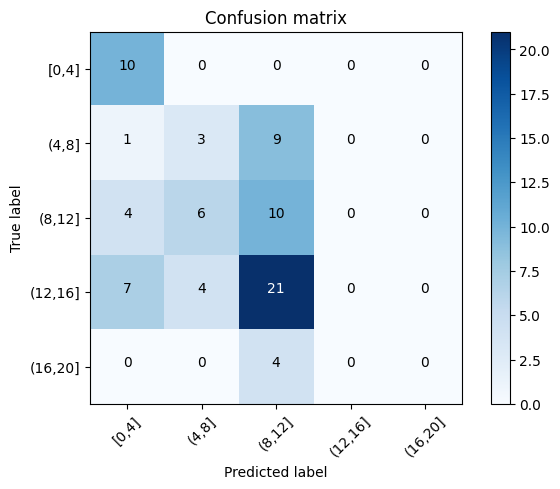

In [59]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
#train the model (Here you should change the hyperparameters)
clf = tree.DecisionTreeClassifier(criterion='gini',max_leaf_nodes=3, max_depth=3)
clf.fit(X_train, y_train) # Train Logistic Regression Classifer
#Predict the response for test dataset
y_pred = clf.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
cm_labels = ["[0,4]","(4,8]","(8,12]","(12,16]","(16,20]"]
plot_confusion_matrix(cm, cm_labels)  
plt.show()

##Group 1 Inputs

In [60]:
print('\nc=gini')
TreeLooper(X1,Y,c='gini')

print('\nc=entropy')
TreeLooper(X1,Y,c='entropy')


c=gini
0.28664556962025317

c=entropy
0.28356962025316457


In [61]:
print('\nc=gini, depth={1,2,3,5,10,100}')
TreeLooper(X1,Y,c='gini', depth=1)    
TreeLooper(X1,Y,c='gini', depth=2)
TreeLooper(X1,Y,c='gini', depth=3)    
TreeLooper(X1,Y,c='gini', depth=5)
TreeLooper(X1,Y,c='gini', depth=10)
TreeLooper(X1,Y,c='gini', depth=100)

print('\nc=entropy, depth={1,2,3,5,10,100}')
TreeLooper(X1,Y,c='entropy', depth=1) #Best
TreeLooper(X1,Y,c='entropy', depth=2)
TreeLooper(X1,Y,c='entropy', depth=3)
TreeLooper(X1,Y,c='entropy', depth=5)
TreeLooper(X1,Y,c='entropy', depth=10)
TreeLooper(X1,Y,c='entropy', depth=100)


c=gini, depth={1,2,3,5,10,100}
0.4046708860759494
0.39093670886075954
0.36220253164556965
0.3481898734177215
0.31436708860759494
0.2888987341772152

c=entropy, depth={1,2,3,5,10,100}
0.4073164556962025
0.3901898734177215
0.3835949367088608
0.3589873417721519
0.300873417721519
0.28405063291139243


In [62]:
print('\nc=gini, leaf={2,3,5,10,100}')
TreeLooper(X1,Y,leaf=2)   #Best
TreeLooper(X1,Y,leaf=3)   
TreeLooper(X1,Y,leaf=5)
TreeLooper(X1,Y,leaf=10)
TreeLooper(X1,Y,leaf=100)

print('\nc=entropy, leaf={2,3,5,10,100}')
TreeLooper(X1,Y,leaf=2, c='entropy')
TreeLooper(X1,Y,leaf=3, c='entropy')     
TreeLooper(X1,Y,leaf=5, c='entropy')
TreeLooper(X1,Y,leaf=10, c='entropy')
TreeLooper(X1,Y,leaf=100, c='entropy')


c=gini, leaf={2,3,5,10,100}
0.4057341772151899
0.40088607594936715
0.3768227848101266
0.36510126582278485
0.32291139240506334

c=entropy, leaf={2,3,5,10,100}
0.40901265822784816
0.40036708860759496
0.39321518987341775
0.38221518987341774
0.3067215189873418


In [63]:
print('\nc=gini, split={2,3,5,10,100}')
TreeLooper(X1,Y,split=2)
TreeLooper(X1,Y,split=3)
TreeLooper(X1,Y,split=5)
TreeLooper(X1,Y,split=10)
TreeLooper(X1,Y,split=100)         

print('\nc=entropy, split={2,3,5,10,100}')
TreeLooper(X1,Y,split=2, c='entropy')
TreeLooper(X1,Y,split=3, c='entropy')
TreeLooper(X1,Y,split=5, c='entropy')
TreeLooper(X1,Y,split=10, c='entropy')     
TreeLooper(X1,Y,split=100, c='entropy')   #Best


c=gini, split={2,3,5,10,100}
0.2891392405063291
0.2874177215189873
0.29624050632911386
0.3209620253164557
0.367746835443038

c=entropy, split={2,3,5,10,100}
0.28427848101265824
0.2801772151898734
0.29392405063291144
0.3156075949367088
0.37903797468354433


Picking the best preforming Hyper-parameter values for each one tuned, with gini chosen at random as all data shows that gini vs entropy shows little to no different between the two criterions when changing other hyper-parameters.

In [64]:
print('\nc=gini, split=100, leaf=3, depth=3')
TreeLooper(X1,Y,split=100, c='gini', leaf=2, depth=1)


c=gini, split=100, leaf=3, depth=3
0.4056582278481013


Lastly creating the model with these selected hyper-parameter values and plotting it's confusion matrix.

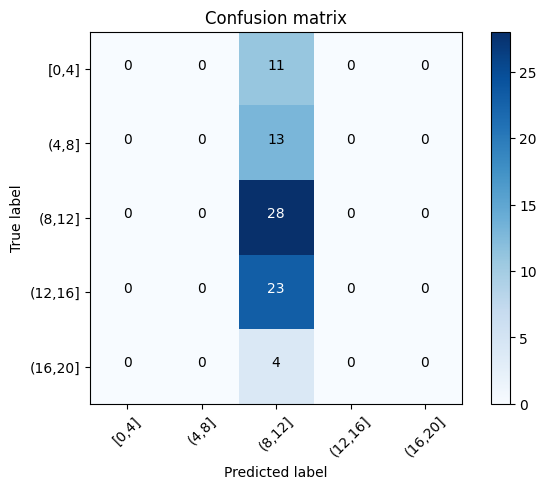

In [65]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
#train the model (Here you should change the hyperparameters)
clf = tree.DecisionTreeClassifier(criterion='gini',max_leaf_nodes=2, max_depth=1, min_samples_split=100)
clf.fit(X_train, y_train) # Train Logistic Regression Classifer
#Predict the response for test dataset
y_pred = clf.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
cm_labels = ["[0,4]","(4,8]","(8,12]","(12,16]","(16,20]"]
plot_confusion_matrix(cm, cm_labels)  
plt.show()

##Group 2 Inputs

In [66]:
print('\nc=gini')
TreeLooper(X2,Y,c='gini')

print('\nc=entropy')
TreeLooper(X2,Y,c='entropy')


c=gini
0.33629113924050635

c=entropy
0.32994936708860756


In [67]:
print('\nc=gini, depth={1,2,3,5,10,100}')
TreeLooper(X2,Y,c='gini', depth=1)
TreeLooper(X2,Y,c='gini', depth=2)
TreeLooper(X2,Y,c='gini', depth=3)     #Best
TreeLooper(X2,Y,c='gini', depth=5)
TreeLooper(X2,Y,c='gini', depth=10)
TreeLooper(X2,Y,c='gini', depth=100)

print('\nc=entropy, depth={1,2,3,5,10,100}')
TreeLooper(X2,Y,c='entropy', depth=1)
TreeLooper(X2,Y,c='entropy', depth=2)
TreeLooper(X2,Y,c='entropy', depth=3)
TreeLooper(X2,Y,c='entropy', depth=5)
TreeLooper(X2,Y,c='entropy', depth=10)
TreeLooper(X2,Y,c='entropy', depth=100)


c=gini, depth={1,2,3,5,10,100}
0.4192025316455696
0.41934177215189866
0.4243164556962025
0.39451898734177215
0.3481898734177215
0.33363291139240503

c=entropy, depth={1,2,3,5,10,100}
0.41988607594936705
0.41925316455696204
0.4202911392405064
0.3945316455696202
0.3328987341772152
0.3301645569620253


In [68]:
print('\nc=gini, leaf={2,3,5,10,100}')
TreeLooper(X2,Y,leaf=2)
TreeLooper(X2,Y,leaf=3)
TreeLooper(X2,Y,leaf=5)
TreeLooper(X2,Y,leaf=10)
TreeLooper(X2,Y,leaf=100)

print('\nc=entropy, leaf={2,3,5,10,100}')
TreeLooper(X2,Y,leaf=2, c='entropy')
TreeLooper(X2,Y,leaf=3, c='entropy')     #Best
TreeLooper(X2,Y,leaf=5, c='entropy')
TreeLooper(X2,Y,leaf=10, c='entropy')
TreeLooper(X2,Y,leaf=100, c='entropy')


c=gini, leaf={2,3,5,10,100}
0.41737974683544304
0.4351645569620254
0.42340506329113925
0.41305063291139243
0.34924050632911396

c=entropy, leaf={2,3,5,10,100}
0.4185443037974683
0.43601265822784807
0.41843037974683545
0.4136455696202531
0.34411392405063296


In [69]:
print('\nc=gini, split={2,3,5,10,100}')
TreeLooper(X2,Y,split=2)
TreeLooper(X2,Y,split=3)
TreeLooper(X2,Y,split=5)
TreeLooper(X2,Y,split=10)
TreeLooper(X2,Y,split=100)         #Best

print('\nc=entropy, split={2,3,5,10,100}')
TreeLooper(X2,Y,split=2, c='entropy')
TreeLooper(X2,Y,split=3, c='entropy')
TreeLooper(X2,Y,split=5, c='entropy')
TreeLooper(X2,Y,split=10, c='entropy')     
TreeLooper(X2,Y,split=100, c='entropy') 


c=gini, split={2,3,5,10,100}
0.3342278481012659
0.3387974683544304
0.34883544303797476
0.36917721518987345
0.39349367088607595

c=entropy, split={2,3,5,10,100}
0.32774683544303795
0.3353291139240507
0.3412784810126583
0.36781012658227846
0.3878101265822785


Picking the best preforming Hyper-parameter values for each one tuned, with gini chosen at random as all data shows that gini vs entropy shows little to no different between the two criterions. Gives us a lower accuracy than some tuned individually.

In [70]:
print('\nc=gini, split=100, leaf=3, depth=3')
TreeLooper(X2,Y,split=100, c='gini', leaf=3, depth=3)


c=gini, split=100, leaf=3, depth=3
0.4018101265822785


Lastly creating the model with these selected hyper-parameter values and plotting it's confusion matrix.

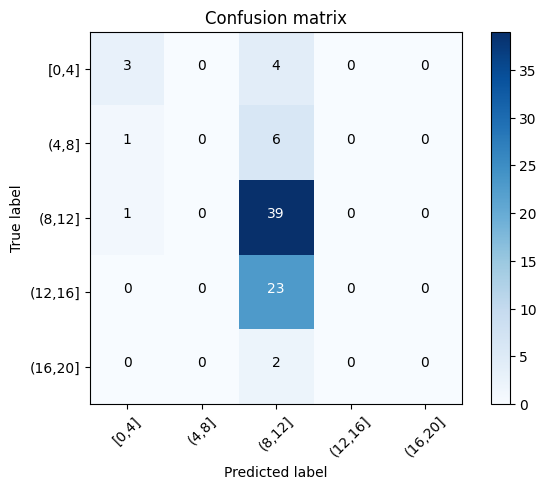

In [71]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X2, Y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
#train the model (Here you should change the hyperparameters)
clf = tree.DecisionTreeClassifier(criterion='gini',max_leaf_nodes=3, max_depth=3)
clf.fit(X_train, y_train) # Train Logistic Regression Classifer
#Predict the response for test dataset
y_pred = clf.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
cm_labels = ["[0,4]","(4,8]","(8,12]","(12,16]","(16,20]"]
plot_confusion_matrix(cm, cm_labels)  
plt.show()

##Model 3 Results

Over all the decission tree was only able to get to about 43.5% accuracy with all given inputs which is sadly far from an exceptible model. When using the far smaller data sets of X1 and X2 initally before any forms of tuning the accruacy took a sigificat drop down to around 28.8% for X1 and 33.0% for X2 both down from the accuracy of the total set which was sitting at 34.8%(all accuracies are an average of the models accuracy over 1000 different splits and trainings). After parameters where tuned the different in accuracy was far less aparent with group X1 and X2 sitting at around 40.5% compared to the 43.5% using all inputs.

In the parameter tuning it showed that for different inputs different values seemed to be favored where in the full set a max_leaf_nodes and max_depth was favored at 3, while for X1 leaf scored highest at 2 and depth at 1.

Overall looking at the confusion matrixs it seems the decission trees where not predicting off much, but more so just always predicting the most common answer to get to the 40ish%

Tuning the weights of each inputs may help improve this model, however it's starting point is so low that it seems to be a fairly poor model for this problem.

#Final Conclusions

All models Created could not get above a 45% accuracy. Looking at the confusion matrixs for each it seems that all models in the end did the same thing, predicted only the middle group of [8,12). Some changes that could be made to find a useable model could be to reduce the number of grade catigories from 5 to just 2 for passing and failing, as well as, getting an expert from the school district to help weight the values of each given input.

Additional calculations/comparisons done in excel: https://uwplatt-my.sharepoint.com/:x:/g/personal/yeagerca_uwplatt_edu/EYqL57sHUyhHlS-VKYBLTroBmbeqrP-ncwN7P8NUzxkd3A?e=tcbfed

Link to paper found on this data set: http://uu.diva-portal.org/smash/get/diva2:1464106/FULLTEXT01.pdf